In [113]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as pl
from functions.multi_gradient_descent import *
from sklearn.linear_model import  LinearRegression

In [114]:
data = pd.read_csv("./data from book/Wage.csv")

data['maritl'] = data['maritl'].apply(lambda x:int(x[0]))
data['race'] = data['race'].apply(lambda x:int(x[0]))
data['region'] = data['region'].apply(lambda x:int(x[0]))
data['jobclass'] = data['jobclass'].apply(lambda x:int(x[0]))
data['health'] = data['health'].apply(lambda x:int(x[0]))
data['education'] = data['education'].apply(lambda x:int(x[0]))
data['health_ins'] = data['health_ins'].apply(lambda x:int(x[0]))
data['year'] = data['year'].apply(lambda x:int(int(x)-2004))


x_features = ["year","age","maritl","race",'education',"jobclass"]
x_data = np.array(data[x_features])
y_data = np.array(data["wage"])
x_test = x_data[300:400]
y_test = y_data[300:400]
x_data = x_data[0:400]
y_data = y_data[0:400]
sample_size = x_data.shape[0]
test_size = x_test.shape[0]

data

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2,18,1,1,1,2,1,1,2,4.318063,75.043154
1,0,24,1,1,4,2,2,2,2,4.255273,70.476020
2,-1,45,2,1,3,2,1,1,1,4.875061,130.982177
3,-1,43,2,3,4,2,2,2,1,5.041393,154.685293
4,1,50,4,1,2,2,2,1,1,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,4,44,2,1,3,2,1,2,1,5.041393,154.685293
2996,3,30,2,1,2,2,1,2,2,4.602060,99.689464
2997,1,27,2,2,1,2,1,1,2,4.193125,66.229408
2998,1,27,1,1,3,2,1,2,1,4.477121,87.981033


C:\Users\DINO\AppData\Local\Temp\ipykernel_9460\3204817363.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


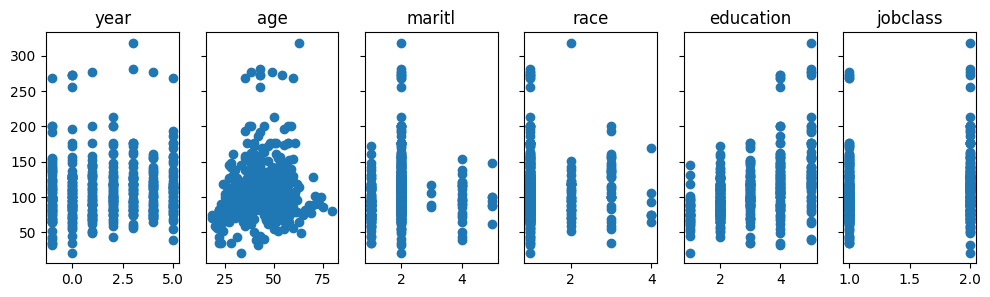

In [115]:
fig,ax=pl.subplots(1, x_data.shape[1], figsize=(12, 3), sharey=True)
for i in range(x_data.shape[1]):
    ax[i].scatter(x_data[:,i], y_data)
    ax[i].set_title(x_features[i])
fig.show()

In [116]:
X = zscore_normalize_features(x_data)
X

array([[ 0.11591082, -2.03775868, -1.17096399, -0.45510944, -1.61713349,
        -0.93698147],
       [-0.88117153, -1.53424578, -1.17096399, -0.45510944,  0.79649858,
         1.06725697],
       [-1.3797127 ,  0.22804939,  0.06488191, -0.45510944, -0.00804544,
        -0.93698147],
       ...,
       [ 1.61153435, -1.45032696, -1.17096399,  0.97830612,  1.60104261,
         1.06725697],
       [-1.3797127 , -0.02370707,  0.06488191, -0.45510944, -0.00804544,
         1.06725697],
       [-0.88117153, -0.1915447 , -1.17096399, -0.45510944, -0.81258946,
        -0.93698147]])

In [117]:
iterations=500000
alpha = 1
lr = LinearRegression()
per_w,per_b = run_gradient_descent_feng(X,y_data,iterations,alpha)
# lr.fit(X,y_data)
# per_w = lr.coef_
# per_b = lr.intercept_

Iteration         0, Cost: 7.01828e+02
Iteration     50000, Cost: 6.78702e+02
Iteration    100000, Cost: 6.78702e+02
Iteration    150000, Cost: 6.78702e+02
Iteration    200000, Cost: 6.78702e+02
Iteration    250000, Cost: 6.78702e+02
Iteration    300000, Cost: 6.78702e+02
Iteration    350000, Cost: 6.78702e+02
Iteration    400000, Cost: 6.78702e+02
Iteration    450000, Cost: 6.78702e+02
w,b found by gradient descent: w: [ 2.44563746  6.13023265  0.60458554 -1.21199665 19.02804244  2.0552375 ], b: 110.3322


In [118]:
pred =np.array([np.dot(per_w,x)+per_b for x in X])

C:\Users\DINO\AppData\Local\Temp\ipykernel_9460\2835153549.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


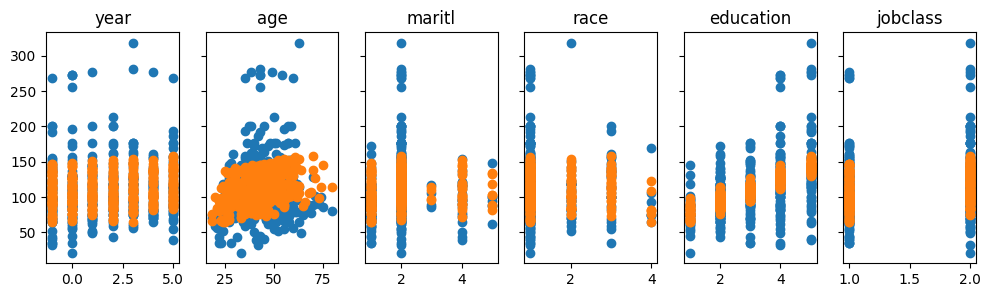

In [119]:
fig,ax=pl.subplots(1, x_data.shape[1], figsize=(12, 3), sharey=True)
for i in range(x_data.shape[1]):
    ax[i].scatter(x_data[:,i], y_data)
    ax[i].scatter(x_data[:,i], pred)
    ax[i].set_title(x_features[i])
fig.show()

In [120]:
def accuracy(x_test,y_test,per_w,per_b,):
    pred =np.array([np.dot(per_w,x)+per_b for x in x_test])
    error = 0
    for i in range(pred.shape[0]-1):
        print(y_test[i] ,":: ",pred[i])
        error += abs(y_test[i] - pred[i]/y_test[i])

    # t =np.sum(y_test)
    # k = np.sum(pred)
    error /= y_test.shape[0]  
    error *= 100
    return error

In [121]:
x_test = zscore_normalize_features(x_test)
print(accuracy(x_test,y_test,per_w,per_b))


41.0998036301194 ::  137.04768872967458
68.3956538035455 ::  82.8818739417357
81.2832532842527 ::  97.98006124298803
73.7757432746946 ::  81.50737665420291
130.982177377461 ::  74.46099764223078
148.413159102577 ::  132.12550168403232
81.226746312023 ::  84.8075850186568
63.1888610037461 ::  135.35323303026416
94.0727147457005 ::  102.66485019601717
92.6581301668597 ::  102.5733947851881
76.8936025176112 ::  98.81942974819808
118.884359339886 ::  96.07661234796826
79.8549003093467 ::  95.92889188302448
86.6951548289402 ::  116.48043572475646
133.971500070695 ::  129.18976775812146
125.525498433836 ::  128.67753924315275
92.8958447894966 ::  79.46559481266945
72.1504556815713 ::  84.31545588280916
118.884359339886 ::  98.6745437829692
70.4760196469445 ::  104.47458838011913
127.115743812184 ::  90.40756512324384
114.475713290347 ::  130.8986576384795
87.9810327856054 ::  115.8071773516668
54.5981500331442 ::  84.57173606946441
84.0459576539924 ::  85.30976384406497
85.3839403789827 ::  